# Recognising Handwriting Digits on MNIST Dataset using KNN

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Step 1. Data Preparation

In [23]:
df = pd.read_csv('./datasets/MNIST_train_dataset.csv')
print(df.shape)
print(df.columns)    #data contains colums as label and pixel1,pixel2,...pixel784 i.e 28*28=784 pixels images
print(df.head())     #first 5 rows of the dataframe

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2  

In [24]:
#pandas dataframe to numpy array
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [25]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [26]:
#splitting the data into test and train
split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


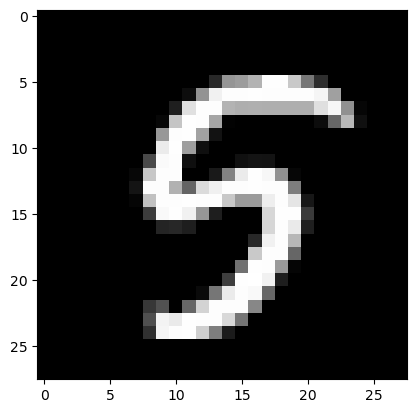

5


In [30]:
#Visualizing samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[8])
print(Y_train[8])

#### Step 2. K-NN

In [ ]:
def dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]

    for i in range(m): 
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))

    vals = sorted(vals)
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #return max val
    new_vals = np.unique(vals[:,1],return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred


#### Step 3. Make Predictions

In [33]:
pred = knn(X_train, Y_train, X_test[1])

print(int(pred), Y_test[1])

7 7


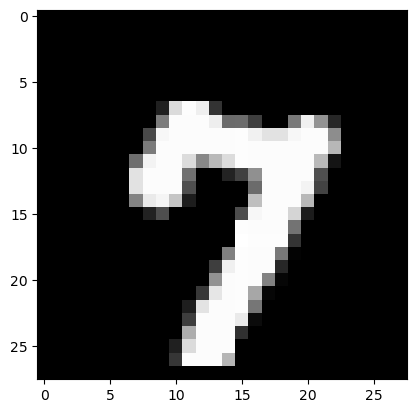

In [34]:
drawImg(X_test[1])

#### Step 4. Testing

In [ ]:
#Method that computes accuracy on test set
def accuracy(X_train,Y_train,X_test,Y_test):
    count = 0
    m = X_test.shape[0]

    for i in range(m):
        pred = knn(X_train,Y_train,X_test[i])
        if pred == Y_test[i]:
            count += 1

    return (count/m)*100


#print(accuracy(X_train,Y_train,X_test,Y_test)) - around 96%

97.0
